In [1]:
import pandas as pd 

data = pd.read_csv("5BL lab 09.csv")
display(data)

,Frequency\n(Hz),CH1 V,CH2 V,ms/div,V0\n(Volts),VC\n(Volts),Phase shift (divisions)
0,3 kHz,2,0.10,0.20,4,0.22,-0.4
1,4 kHz,2,0.10,0.20,4,0.16,-0.3
2,5 kHz,2,0.05,0.10,4,0.13,-0.4
3,6 kHz,2,0.05,0.10,4,0.11,-0.4
4,7 kHz,2,0.05,0.10,4,0.09,-0.3
5,8 kHz,2,0.05,0.10,4,0.08,-0.2
6,9 kHz,2,0.05,0.04,4,0.07,-0.6


In [2]:
data.iloc[:, 0] = data.iloc[:, 0].str.replace(" kHz", "").astype(int) * 1000

# ms = ms/div * div 
data["Phase shift (msec)"] = data.iloc[:, 3] * data.iloc[:, 6]
# deg = ms / per * 360 and per = 1/f so deg = ms * f * 360
data["Phase shift (deg)"] = data.iloc[:, 7] / 1000 * data.iloc[:, 0] * 360

display(data)

,Frequency\n(Hz),CH1 V,CH2 V,ms/div,V0\n(Volts),VC\n(Volts),Phase shift (divisions),Phase shift (msec),Phase shift (deg)
0,3000,2,0.10,0.20,4,0.22,-0.4,-0.080,-86.4
1,4000,2,0.10,0.20,4,0.16,-0.3,-0.060,-86.4
2,5000,2,0.05,0.10,4,0.13,-0.4,-0.040,-72.0
3,6000,2,0.05,0.10,4,0.11,-0.4,-0.040,-86.4
4,7000,2,0.05,0.10,4,0.09,-0.3,-0.030,-75.6
5,8000,2,0.05,0.10,4,0.08,-0.2,-0.020,-57.6
6,9000,2,0.05,0.04,4,0.07,-0.6,-0.024,-77.76


In [3]:
import numpy as np
import matplotlib.pyplot as plt

freq = data.iloc[:, 0]
omega = np.array(2 * np.pi * freq)

V_c = data.iloc[:, 5]
V_0 = data.iloc[:, 4]
ratio = np.array(V_c / V_0)

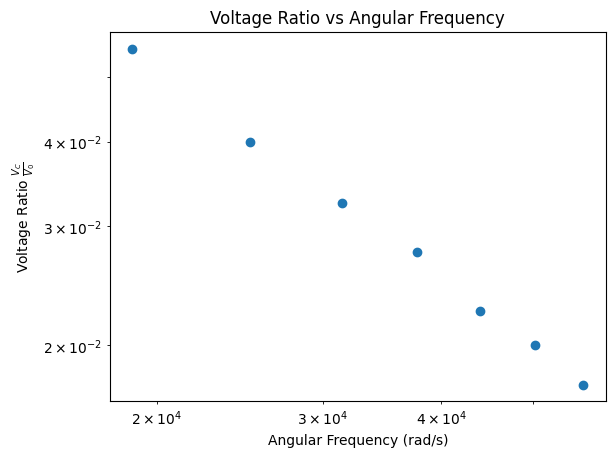

In [4]:
plt.figure()
plt.scatter(omega, ratio)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel(r"Voltage Ratio $\frac{V_C}{V_0}$")
plt.title("Voltage Ratio vs Angular Frequency")
plt.grid()
plt.show()

In [5]:
from scipy.optimize import curve_fit

def model(omega, A, tau):
    return A / np.sqrt(1 + (omega ** 2) * (tau ** 2))

params, cov = curve_fit(model, omega, ratio)
A_fit, tau_fit = params 
A_err, tau_err = np.sqrt(np.diag(cov))

omega_fit = np.logspace(np.log10(min(omega)), np.log10(max(omega)), 100)
volt_fit = model(omega_fit, A_fit, tau_fit)

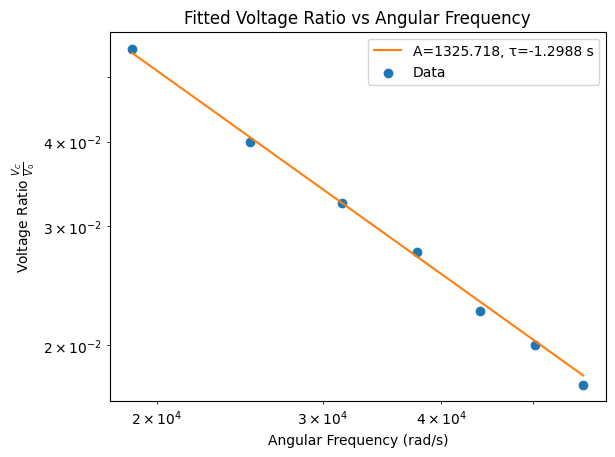

In [6]:
plt.figure()
plt.loglog(omega_fit, volt_fit, label=f'A={A_fit:.3f}, τ={tau_fit:.4f} s', color="C1")
plt.scatter(omega, ratio, label="Data")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel(r"Voltage Ratio $\frac{V_C}{V_0}$")
plt.title("Fitted Voltage Ratio vs Angular Frequency")
plt.legend()
plt.grid()
plt.show()

In [7]:
phase = np.array(data.iloc[:, 8] * np.pi / 180)
import numpy as np 

def lowpass(omega, tau_fit):
    return np.arctan((-omega * tau_fit))

popt, pcov = curve_fit(lowpass, omega, phase)
tau_fit = popt[0]
phase_fit = lowpass(omega, tau_fit)
stderr = np.sqrt(np.diag(pcov))

plt.figure()
plt.semilogx(freq, phase_fit, color="C1")
plt.scatter(freq,phase, label="Data")
plt.legend()
plt.grid()
plt.show()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable arctan method